In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
%matplotlib inline


In [32]:
X = pd.read_csv("/Users/icu639/Downloads/570 Data Science Essentials/Breast Cancer/breast_cancer.csv")
X

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0
5,5,1017122,8,10,10,8,7,10,9,7,1,1
6,6,1018099,1,1,1,1,2,10,3,1,1,0
7,7,1018561,2,1,2,1,2,1,3,1,1,0
8,8,1033078,2,1,1,1,2,1,1,1,5,0
9,9,1033078,4,2,1,1,2,1,2,1,1,0


In [33]:
y = X.pop("malignant")

In [34]:
X.describe()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
count,699.000000,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,349.000000,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413
std,201.928205,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078
min,0.000000,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,174.500000,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,349.000000,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,523.500000,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,698.000000,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [92]:
X.drop(["Unnamed: 0", "id number"], axis=1, inplace=True)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [119]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [120]:
model.oob_score_

0.87457281258400477

In [121]:
y_oob = model.oob_prediction_
print("c-stat: ", roc_auc_score(y, y_oob))

('c-stat: ', 0.99184167134755108)


In [122]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

('C-stat: ', 0.99184167134755108)


In [123]:
model.feature_importances_

array([ 0.04793614,  0.56023943,  0.15546697,  0.01370397,  0.0150998 ,
        0.1466744 ,  0.02892051,  0.02718073,  0.00477804])

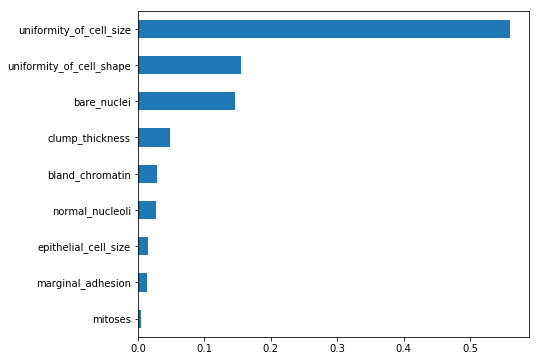

In [124]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

# n_jobs

In [125]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.48 s per loop


In [126]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-5, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.28 s per loop


In [127]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-4, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.25 s per loop


In [128]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-3, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.26 s per loop


In [129]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-2, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.45 s per loop


In [130]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 2.52 s per loop


# n_estimators

(30, 'trees')
('C-stat: ', 0.9899753574081791)

(50, 'trees')
('C-stat: ', 0.99060501186830707)

(100, 'trees')
('C-stat: ', 0.99184167134755108)

(200, 'trees')
('C-stat: ', 0.99183714145934876)

(500, 'trees')
('C-stat: ', 0.99203192665205031)

(1000, 'trees')
('C-stat: ', 0.99181902190653937)

(2000, 'trees')
('C-stat: ', 0.99200927721103849)



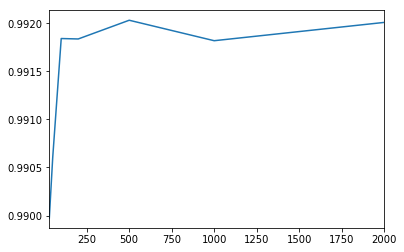

In [131]:

results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print (trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

# max_features

('auto', 'option')
('C-stat: ', 0.99181902190653937)

(None, 'option')
('C-stat: ', 0.99181902190653937)

('sqrt', 'option')
('C-stat: ', 0.99263440178296403)

('log2', 'option')
('C-stat: ', 0.99263440178296403)

(0.9, 'option')
('C-stat: ', 0.9919005598941818)

(0.2, 'option')
('C-stat: ', 0.99285183641667729)



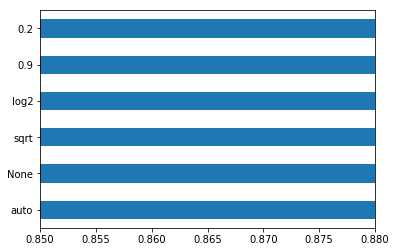

In [132]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

# min_samples_leaf

(1, 'min samples')
('C-stat: ', 0.99181902190653937)

(2, 'min samples')
('C-stat: ', 0.991248255993042)

(3, 'min samples')
('C-stat: ', 0.99120295711101858)

(4, 'min samples')
('C-stat: ', 0.99113953867618543)

(5, 'min samples')
('C-stat: ', 0.99123013644023272)

(6, 'min samples')
('C-stat: ', 0.99118483755820908)

(7, 'min samples')
('C-stat: ', 0.99088586493685327)

(8, 'min samples')
('C-stat: ', 0.99066843030314011)

(9, 'min samples')
('C-stat: ', 0.99065031075033061)

(10, 'min samples')
('C-stat: ', 0.99035133812897502)



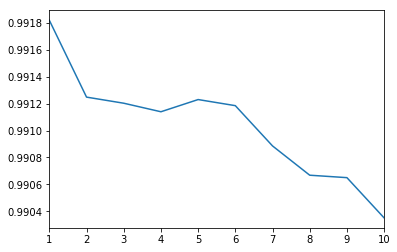

In [133]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print (min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, min_samples_leaf_options).plot();


# Final Random Forest Model

In [157]:

model = RandomForestRegressor(n_estimators=100, 
                              oob_score=True, 
                              n_jobs=-3, 
                              random_state=42, 
                              max_features=0.2, 
                              min_samples_leaf=1)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print ("C-stat: ", roc)

('C-stat: ', 0.99027885991773712)


# K-Fold Implementation

In [135]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [136]:
data = pd.read_csv("/Users/icu639/Downloads/570 Data Science Essentials/Breast Cancer/breast_cancer.csv")

In [137]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [138]:
y = data.pop("malignant")

In [139]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [140]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [141]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [142]:
GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [143]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:

best_rfc = estimator.best_estimator_

In [145]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

('Accuracy: ', 0.97857142857142854)


In [146]:
y_hat = best_rfc.predict(X_test)

In [147]:

y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [148]:

y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, Length: 140, dtype: int64

In [149]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print (correct / float(total))

0.978571428571


In [150]:
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98        95
          1       0.96      0.98      0.97        45

avg / total       0.98      0.98      0.98       140



In [151]:
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 1 44]]


In [152]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", roc)

('AUC Score: ', 0.9953216374269005)


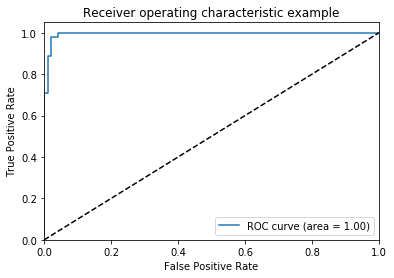

In [153]:

fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [154]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [155]:
scores

array([ 0.95774648,  0.98571429,  0.97142857,  0.91428571,  0.98571429,
        0.95714286,  0.97142857,  0.98571429,  0.98550725,  0.98550725])

In [156]:

mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound))

Score is 0.970019 +/-  0.015417
95 percent probability that if this experiment were repeated over and over the average score would be between 0.954602 and 0.985436


# AUC Score compared to K-Fold CV

AUC Score is: 0.99027885991773712

However, AUC is against single holdout set, this subset may not have any special case. 
On the other hand K-Fold splits the data in 10 chunks and test againt each hold out case in each interation

# Model Performance

AUC score is 0.99027885991773712, means quite a good area under the curve is indicating we have True postive. <br>
Accuracy of our mode is 97.85% which is different then area under curve (AUC). <br>
Precision is 96% of the our model is predicting a cancer is malignant is accurate. 4% of the time it is not. Which is quite good.<br>
Recall is of the number if malignant cancer identification, 98% of the time are actually maligant. Which is quite good.
